In [6]:
%load_ext autoreload
%autoreload 2
import os
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import sparse
import utils

sys.path.insert(0, "../libs/network_embedding/")
from network_embedding import dataset, embedding, projection

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [2]:
node_table, A = dataset.load_airport()

In [3]:
node_table.head()

,id,Airport ID,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Altitude,...,alpha-2_y,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,deg
0,0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,...,PG,598.0,ISO 3166-2:PG,Oceania,Melanesia,NaN,9.0,54.0,NaN,1
1,1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,...,PG,598.0,ISO 3166-2:PG,Oceania,Melanesia,NaN,9.0,54.0,NaN,5
2,2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,...,PG,598.0,ISO 3166-2:PG,Oceania,Melanesia,NaN,9.0,54.0,NaN,6
3,3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,...,PG,598.0,ISO 3166-2:PG,Oceania,Melanesia,NaN,9.0,54.0,NaN,5
4,4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,...,PG,598.0,ISO 3166-2:PG,Oceania,Melanesia,NaN,9.0,54.0,NaN,33


# Embedding

In [7]:
vec = embedding.embed_network(A, dim=128)

# Visualization

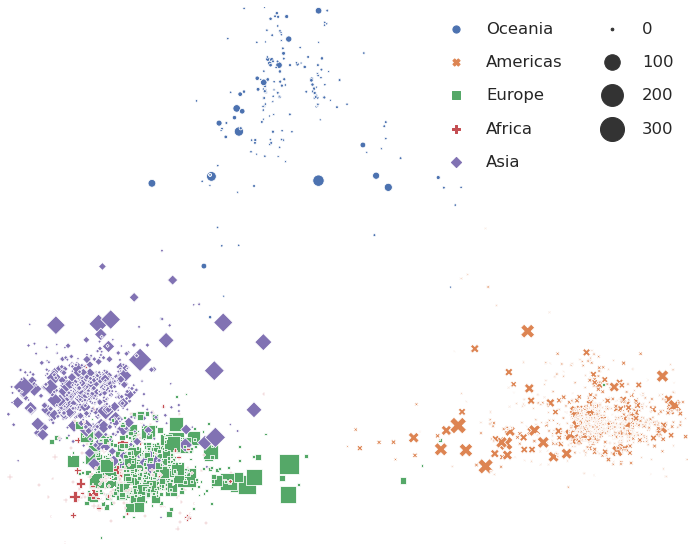

In [8]:
# Project the nodes onto a 2d-dimensional space for visualization
regions = node_table.fillna("Unknown")["region"].values
vec_2d = projection.get_semi_space(vec, vec, regions, dim=2, mode="lda")
# vec_2d = projection.pca(vec, dim = 2)

# Plot
sns.set_style("white")
sns.set(font_scale=1.5)
sns.set_style("ticks")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
data_table = pd.DataFrame(
    {
        "x": vec_2d[:, 0],
        "y": vec_2d[:, 1],
        "Name": node_table["Name"],
        "Region": regions,
        "id": node_table["id"].values,
        "Country": node_table["Country"].values,
        "deg": node_table["deg"].values,
    }
)
th = 0.001
xmin = np.quantile(data_table["x"], th)
xmax = np.quantile(data_table["x"], 1 - th)
ymin = np.quantile(data_table["y"], th)
ymax = np.quantile(data_table["y"], 1 - th)
data_table = data_table[data_table["Region"] != "Unknown"]
# data_table = data_table.sort_values(by =  "")

ax = sns.scatterplot(
    data=data_table,
    x="x",
    y="y",
    hue=data_table["Region"].tolist(),
    style=data_table["Region"].tolist(),
    size=data_table["deg"].tolist(),
    sizes=(5, 400),
    linewidth=0.8,
    ax=ax,
)

ax.axis("off")
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)

lgnd = ax.legend(frameon=False, markerscale=1.2, labelspacing=1.1, ncol=2)

fig.tight_layout()
fig.savefig("embedding-airport.png", dpi=300, bbox_inches="tight", pad_inches=0)

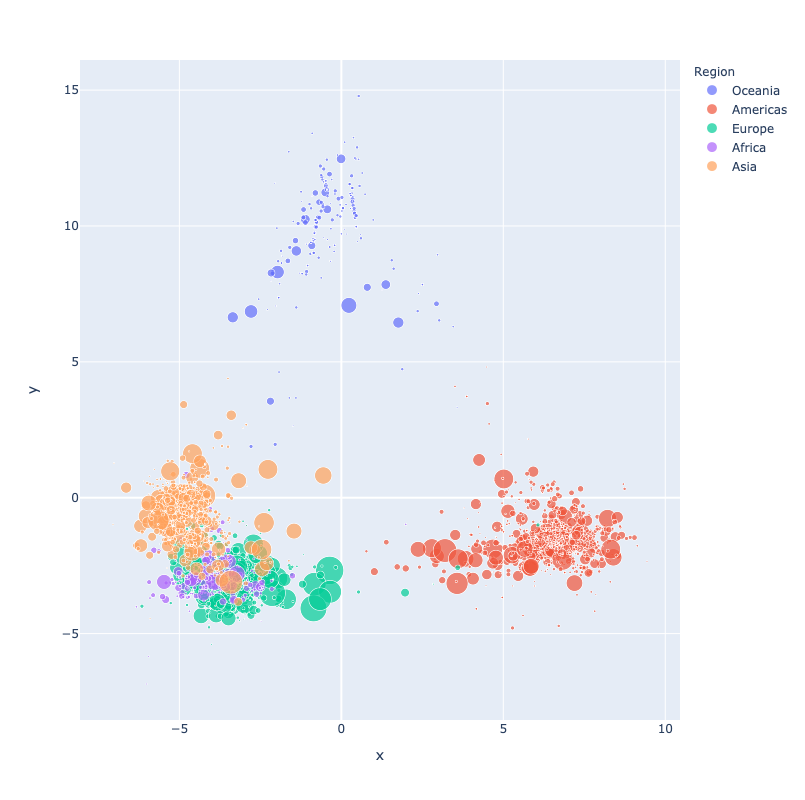

In [50]:
import plotly.express as px

fig = px.scatter(
    data_table,
    x="x",
    y="y",
    size="deg",
    color="Region",
    hover_data=["id", "Name", "Countryd"],
    width=800,
    height=800,
)
fig.show()

In [60]:
data_table[data_table["Name"].apply(lambda x : "Miami" in x)]


,x,y,Name,Region,id,Country,deg
1650,6.328504,-1.292028,Miami Intl,Americas,1650,United States,105


/home/skojaku/projects/graph-embedding-review-ja/notebook/utils.py:47: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



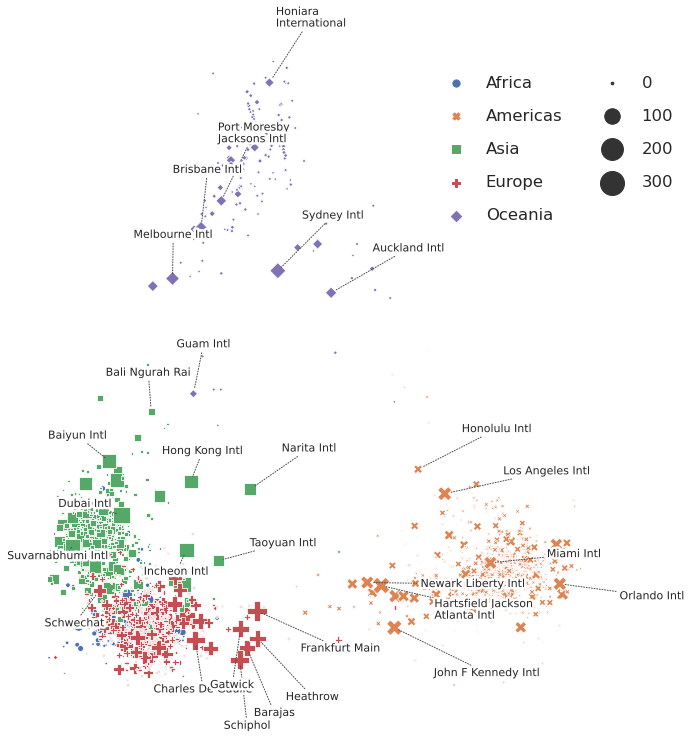

In [75]:

with_annotation_list = [
    171,
    231,
    233,
    545,
    592,
    256,
    687,
    1798,
    1006,
    1008,
    1405,
    1558,
    961,
    991,
    1806,
    1551,
    1537,
    1522,
    4,
    901,
    1889,
    #1538,
    1650,
    1776,
    1734,
    1695,
    1623,
    1618,
    1773,
    1714,
    #1635,
]

# Plot
sns.set_style("white")
sns.set(font_scale=1.5)
sns.set_style("ticks")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10.5))
th = 0.001
xmin = np.quantile(data_table["x"], th)
xmax = np.quantile(data_table["x"], 1 - th)
ymin = np.quantile(data_table["y"], th)
ymax = np.quantile(data_table["y"], 1 - th)
# data_table = data_table[data_table["Region"] != "Unknown"]
# data_table = data_table.sort_values(by =  "")

dg = data_table[data_table["id"].apply(lambda x: x in with_annotation_list)]

data_table["order"] = data_table["id"].apply(lambda x: 1 if x in with_annotation_list else 0)
data_table = data_table.sort_values(by = ["order", "Region"])



ax = sns.scatterplot(
    data=data_table,
    x="x",
    y="y",
    hue=data_table["Region"].tolist(),
    style=data_table["Region"].tolist(),
    size=data_table["deg"].tolist(),
    sizes=(5, 400),
    linewidth=0.8,
    ax=ax,
)

ax.axis("off")



utils.repel_labels(
    ax,
    dg.x,
    dg.y,
    dg["Name"].values,#.apply(lambda x: rename.get(x, x)),
    fontsize=11,
    label_width=20,
    zorder=1,
    k=0.8,
)


lgnd = ax.legend(frameon=False, loc = "upper right", bbox_to_anchor=(1.2,1), markerscale=1.2, labelspacing=1.1, ncol=2)
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)

fig.tight_layout()
fig.savefig(
    "embedding-airport-annotation.png", dpi=300, bbox_inches="tight", pad_inches=0
)